## 데이터 분석 프로젝트 수행 절차
1. 문제 정의
2. 데이터 수집
3. 데이터 전처리 및 가공
4. 데이터 시각화 및 통찰 도출

### 1. 문제 정의
> 현재 하와이 코로나 상황이 대한민국보다 더 나은 것이 맞나요? 

> (프로젝트 기대 결과) 일자별 총 인구 대비 확진자 수 비율의 변화 추이 확인

### 2. 데이터 수집
1. 포괄성 : 필요한 데이터를 포함하고 있는가 ?
2. 최신성 : 최신의 데이터를 포함하고 있는가 ?
3. 정확성 : 정확한 데이터를 포함하고 있는가 ?
4. 일관성 : 데이터의 형태가 일관되어 있는가 ?
5. 신뢰성 : 왜곡이 없고 신뢰할 수 있는 데이토 인가 ?
6. 사용성 : 사용하기 편한가 ?

> (프로젝트 기대 결과) 일자별 총 인구 대비 확진자 수 비율의 변화 추이 확인
 - 각 지역의 총 인구
 - 최신 정보를 포함한 각 지역의 일자별 코로나 확진자 수

#### 2.1 데이터 검색
> google - 코로나 owid


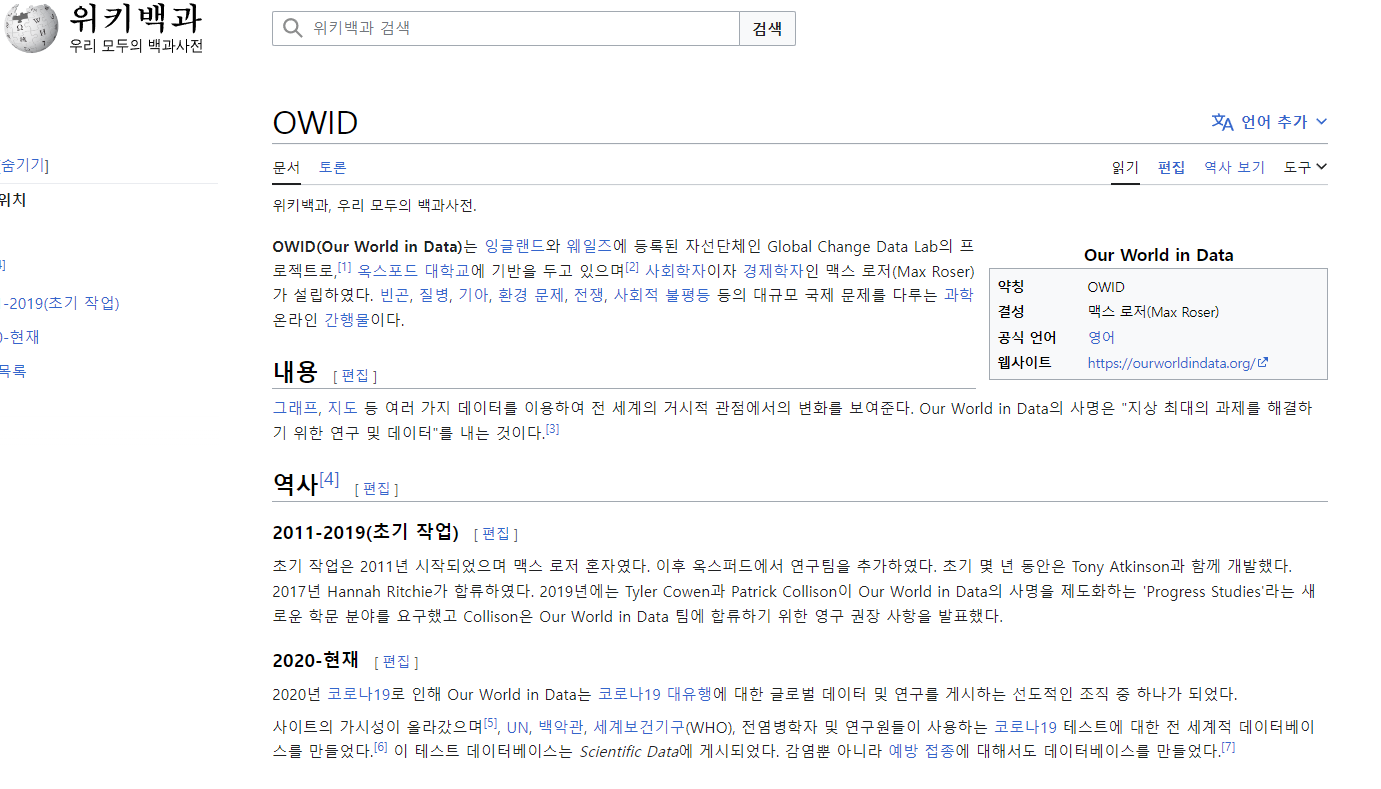

#### Quiz 1 :  OWID 자료에서 찾아보세요. "2019년 전세계 인구 중 하루 30달러 이하로 생활하는 인구 비율은 ?"
#### Quiz 2 : UN에서 극단적 빈곤으로 분류한 하루 생활 비 기준은 몇 달러인가요? 그리고 전세계 인구 중 극단적 빈곤 비율은 ?

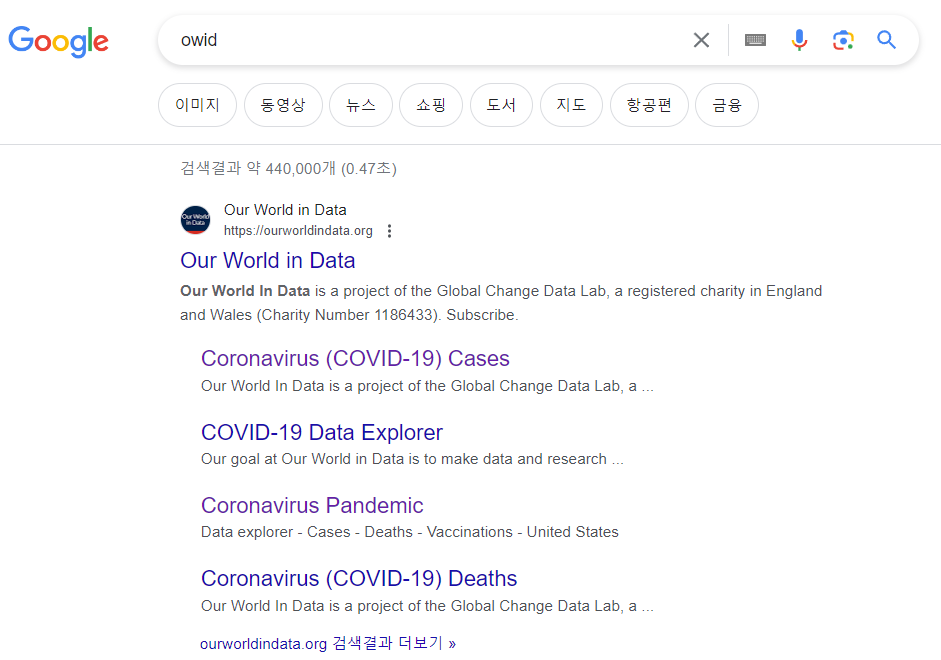

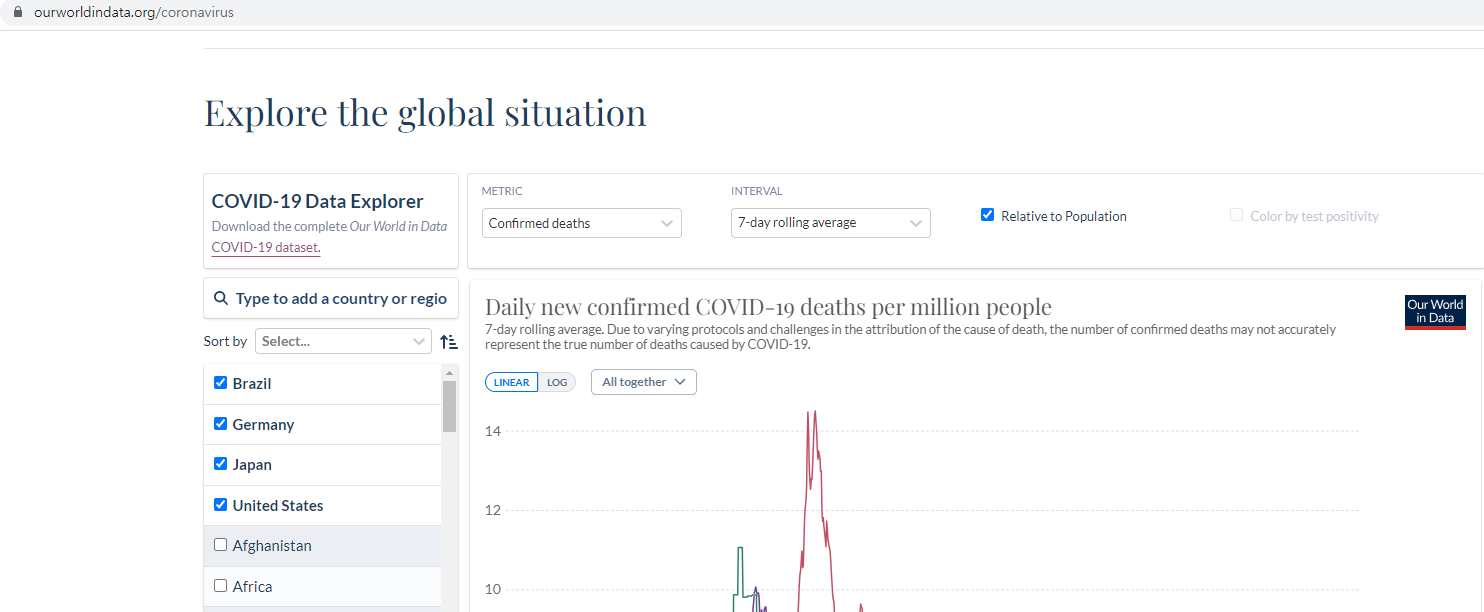

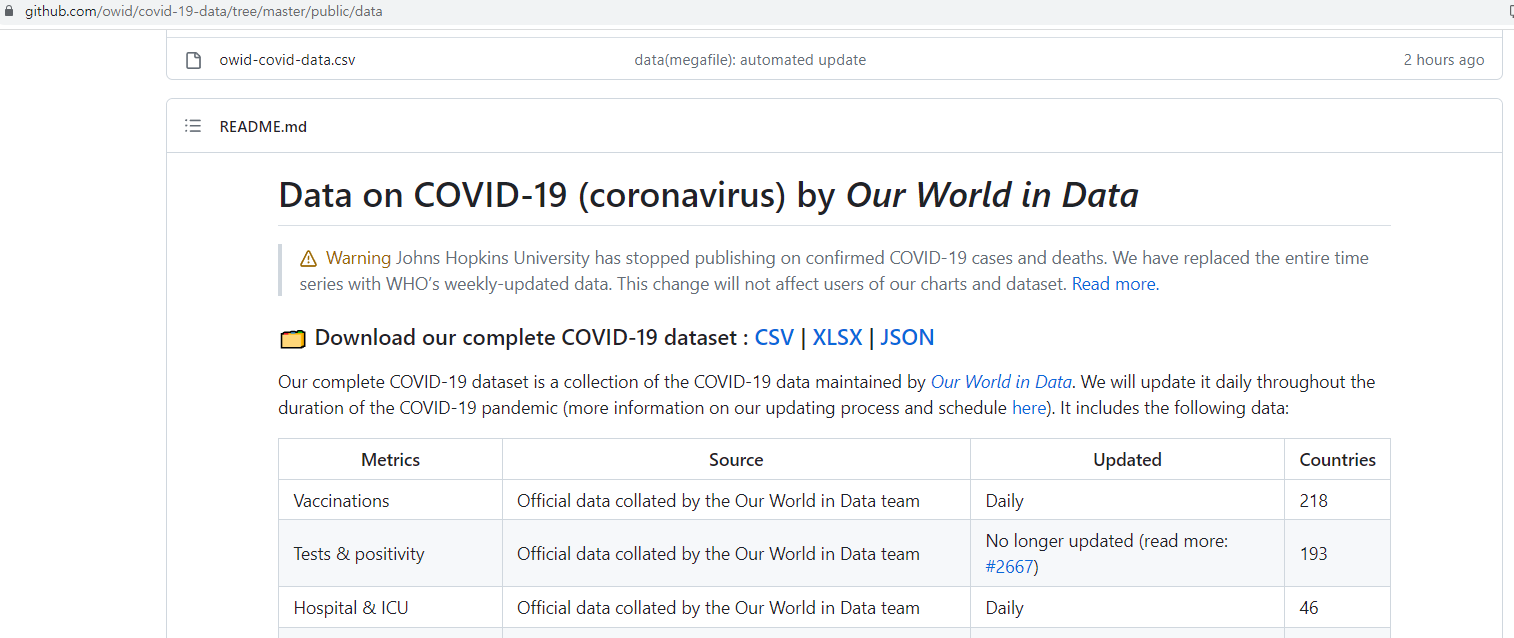

## LAB 1

### 3. 데이터 정제 및 가공

#### 3.1 csv 파일 탑재

In [ ]:
import pandas as pd

raw_df = pd.read_csv('owid-covid-data.csv')
raw_df.head()

In [ ]:
# 원천 데이터 정보 확인
raw_df.info()


#### 3.2 데이터 가공하기
> 3.2.1 원하는 변수(컬럼)만 추출하기
1. iso_code : 국제표준 국가 코드(KOR, USA)\
2. location : 국가 이름
3. date : 일자
4. total_cases : 전체 확진자 수
5. population : 인구

#### Quiz : 'https://github.com/owid/covid-19-data/tree/master/public/data'에서 다음 변수의 설명을 찾아 완성하시오.
- iso_code : SO 3166-1 alpha-3 – three-letter country codes. Note that OWID-defined regions (e.g. continents like 'Europe') contain
prefix 'OWID_'.
- location : 
- date :
- total_cases :
- population :

In [ ]:
# 원하는 변수(컬럼) 리스트 만들기
selected_columns = ['iso_code', 'location', 'date', 'total_cases', 'population']

# 원하는 변수(컬럼)로만 구성된 데이터프레임 만들기
revised_df = raw_df[selected_columns]

# 데이터 확인하기
revised_df.head()

In [ ]:
# 어떤 나라들의 데이터가 있는지 확인하기
# Series 타입 데이터로 반환됨
revised_df['location']

In [ ]:
# 중복을 제거하고 확인하기
# 대한민국, 미국 데이터 확인하기
# Numpy의 ndarray 타입으로 반환됨
revised_df['location'].unique()

### Quiz : revised_df['location']에서 대한민국, 미국, 베트남에 대한 값을 확인해 봅시다.
- 대한민국 : 'South Korea'
- 미국 :
- 베트남 : 

> 3.2.2 대한민국 데이터만 추출하기

In [ ]:
# location이 "South Korea"인 데이터만 추출
kor_df = revised_df.query('location == "South Korea" ')

# 데이터 확인하기
kor_df.head(20)

In [ ]:
# 교재 : 다른 방법으로 대한민국 데이터만 추출
# location이 "South Korea"인 데이터만 추출
kor_df = revised_df[revised_df.location =="South Korea"]

# 데이터 확인하기
kor_df.head()

In [ ]:
# 날자별로 분석하기 위해 색인을 날자로 변경
kor_df_index_df = kor_df.set_index('date')

# 데이터 확인
kor_df_index_df.head()

## LAB 2 - 혼자서 해보기

> 3.2.3 (혼자 해보기) 미국 데이터만 추출하기
- revised_df에서 미국 데이터만 추출하여 데이터 프레임 usa_df 만들기
- 날자별로 분석하기 위해 색인을 날자로 변경하여 usa_df_index_df 만들기


In [ ]:
# revised_df에서 미국 데이터만 추출하여 데이터 프레임 usa_df 만들기
### 채워 놓으세요

# usa_df 데이터 확인하기
### 채워 놓으세요


In [ ]:
# 날자별로 분석하기 위해 색인을 날자로 변경하여 usa_df_index_df 만들기
### 채워 놓으세요


# usa_df_index_df 데이터 확인
### 채워 놓으세요


## LAB 3

### 4. 데이터 시각화

#### 4.1 시각화 준비하기
> 그래프를 그리기 위한 데이터 확보하기

In [ ]:
# 대한민국 확진자 수 구하기
kor_total_cases = kor_df[['date', 'total_cases']]

# 대한민국 확진자 수 확인
kor_total_cases.head()

In [ ]:
# 변수명 바꾸기 ('total_cases' 를 'KOR'로 변경)
kor_total_cases = kor_total_cases.rename(columns= {'total_cases' : 'KOR'})

# 대한민국 확진자 수 확인
kor_total_cases.head()

In [ ]:
# 미국 확진자 수 구하기
usa_total_cases = usa_df[['date', 'total_cases']]

# 대한민국 확진자 수 확인
usa_total_cases.head()

In [ ]:
# 변수명 바꾸기 ('total_cases' 를 'USA'로 변경)
### usa_total_cases = 

# 미국 확진자 수 확인
usa_total_cases.head()

In [ ]:
# 대한민국 데이터와 미국 데이터 합치기
final_df = pd.merge(kor_total_cases, usa_total_cases, how = 'left', on='date')

In [ ]:
final_df.head(20)

In [ ]:
# index를 date로 변경
final_df = final_df.set_index('date')

final_df.head()

In [ ]:
final_df.plot.line()

In [ ]:
final_df.plot.line(rot=45)

In [ ]:
# 2022년 이후 데이터만 보기
# 단위는 10의 8승, 가장 큰 값은 100,000,000명이 넘는다.
final_df['2022-01-01':].plot.line()

#### 결과 해석하기
> 2022년 미국의 코로나 상황이 대한민국의 상황 보다 나쁘다고 할 수 있을까? 

### LAB 4


#### 4.2  인구 수 대비 비율 알아보기

In [ ]:
kor_df.head()

In [ ]:
# 대한민국 인구수 알아보기 (2020년 1월 22)
kor_population = kor_df.query('date =="2020-01-22"')['population']
kor_population.iloc[0]

In [ ]:
# 미국 인구수 알아보기 (2020년 1월 22일자)
usa_population = usa_df.query('date =="2020-01-22"')['population']
usa_population.iloc[0]

In [ ]:
# 미국과 대한민국의 인구비율 확인하기
rate = round((usa_population.iloc[0] / kor_population.iloc[0]), 2)
rate

In [ ]:
final_df.head(20)

In [ ]:
#  인구수를 반영한 확진자 비율로 그리기 
final_df['KOR'] = final_df['KOR'] * rate
final_df.head(20)

In [ ]:
final_df.plot.line(rot=45)

In [ ]:
# 2022년 이후 데이터만 보기
# 단위는 10의 8승, 가장 큰 값은 200,000,000명이 넘는다.
final_df['2022-01-01':].plot.line(rot=45)

### 대한민국 코로나 확진자 비율이 낮게 유지되다가 2022년 2월 초부터 급격히 상승
### 2022년 3월 부터 미국을 역전하는 상황 발생

## LAB 5 : 직접 풀어보기

### (과제 1) 2022년을 기준으로 다음 과제를 수행하시오.
> 안나는 프랑스로 여행을가도 되는 지 확인하고 싶다. 대한민국과 프랑스의 코로나 상황에 대해 '일자별 총 인구 대비 확진자 비율 변동 추이'를 확인해 보자

### (과제 2) 대한민국과 프랑스뿐만 아니라 미국을 포함한 여러분이 원하는 2개 국가를 추가해보자.
> 총 5개 국의 2022 확진자 비율을 비교할 수 있는  그래프를 그려보자

### 생각해 보기---
> 현재 하와이 코로나 상황이 대한민국보다 더 나은 것이 맞나요? 

> (프로젝트 기대 결과) 일자별 총 인구 대비 확진자 수 비율의 변화 추이 확인

> 미국과의 코로나 확진자 비교는 수행하였으나 하와이와는 비교하지 못함